<a href="https://colab.research.google.com/github/CallmeAk/Valorant-Weapons-Stats/blob/main/valorant-stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [18]:
from google.colab import files
 
 
uploaded = files.upload()

Saving valorant-stats.csv to valorant-stats (2).csv


In [19]:
df = pd.read_csv("valorant-stats.csv")
print(df)

        Name Weapon Type  Price  Fire Rate Wall Penetration  \
0    Classic     Sidearm      0       6.75              Low   
1     Shorty     Sidearm    200       3.30              Low   
2     Frenzy     Sidearm    400      10.00              Low   
3      Ghost     Sidearm    500       6.75           Medium   
4    Sheriff     Sidearm    800       4.00             High   
5    Stinger         SMG   1000      18.00              Low   
6    Spectre         SMG   1600      13.33           Medium   
7    Bulldog       Rifle   2100       9.15           Medium   
8   Guardian       Rifle   2500       6.50           Medium   
9    Phantom       Rifle   2900      11.00           Medium   
10    Vandal       Rifle   2900       9.25           Medium   
11  Marshall      Sniper   1100       1.50           Medium   
12  Operator      Sniper   4500       0.75             High   
13     Bucky     Shotgun    900       1.10              Low   
14     Judge     Shotgun   1500       3.50           Me

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               17 non-null     object 
 1   Weapon Type        17 non-null     object 
 2   Price              17 non-null     int64  
 3   Fire Rate          17 non-null     float64
 4   Wall Penetration   17 non-null     object 
 5   Magazine Capacity  17 non-null     int64  
 6   HDMG_0             17 non-null     int64  
 7   BDMG_0             17 non-null     int64  
 8   LDMG_0             17 non-null     int64  
 9   HDMG_1             17 non-null     int64  
 10  BDMG_1             17 non-null     int64  
 11  LDMG_1             17 non-null     int64  
 12  HDMG_2             17 non-null     int64  
 13  BDMG_2             17 non-null     int64  
 14  LDMG_2             17 non-null     int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 2.1+ KB


# Check Data

In [21]:
df.isna().any()

Name                 False
Weapon Type          False
Price                False
Fire Rate            False
Wall Penetration     False
Magazine Capacity    False
HDMG_0               False
BDMG_0               False
LDMG_0               False
HDMG_1               False
BDMG_1               False
LDMG_1               False
HDMG_2               False
BDMG_2               False
LDMG_2               False
dtype: bool

In [22]:
display(df.columns)
display(df.index)

Index(['Name', 'Weapon Type', 'Price', 'Fire Rate', 'Wall Penetration',
       'Magazine Capacity', 'HDMG_0', 'BDMG_0', 'LDMG_0', 'HDMG_1', 'BDMG_1',
       'LDMG_1', 'HDMG_2', 'BDMG_2', 'LDMG_2'],
      dtype='object')

RangeIndex(start=0, stop=17, step=1)

# What are the Weapon Types available in the game?

In [23]:
df_weapon_type = df['Weapon Type'].value_counts()
df_weapon_type


Sidearm    5
Rifle      4
SMG        2
Sniper     2
Shotgun    2
Heavy      2
Name: Weapon Type, dtype: int64

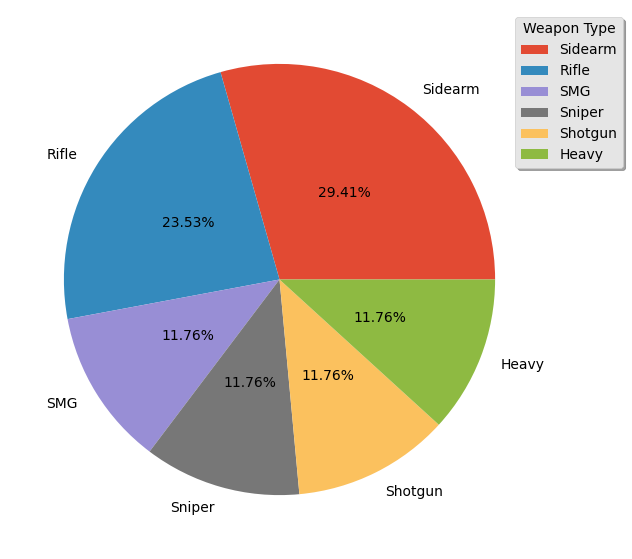

In [24]:
fig, ax = plt.subplots(figsize=(15,7))
plt.pie(df_weapon_type, labels=df_weapon_type.index,pctdistance=0.5, autopct='%1.2f%%', shadow=False)
plt.legend(loc='upper right', title='Weapon Type', shadow=True, bbox_to_anchor=(1.15, 1))
plt.show()

# What is the pricing?

## Based on Weapon

In [25]:
weapon_price = df[['Name', 'Price']].sort_values(by='Price', ascending=False)
weapon_price

,Name,Price
12,Operator,4500
16,Odin,3200
9,Phantom,2900
10,Vandal,2900
8,Guardian,2500
7,Bulldog,2100
6,Spectre,1600
15,Ares,1600
14,Judge,1500
11,Marshall,1100


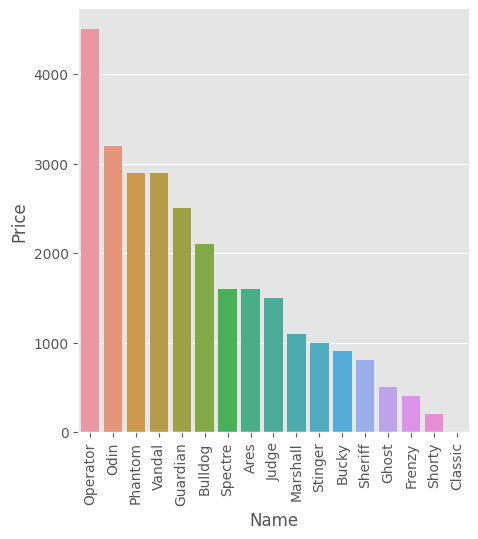

In [26]:
sns.catplot(kind='bar', data=weapon_price, x='Name', y='Price')
plt.xticks(rotation=90)
plt.show()

## Based on Type

In [27]:
type_price = df.groupby('Weapon Type')[['Weapon Type', 'Price']].agg('sum').sort_values('Price', ascending=False).reset_index()
type_price

<ipython-input-27-249edbeb0c7c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  type_price = df.groupby('Weapon Type')[['Weapon Type', 'Price']].agg('sum').sort_values('Price', ascending=False).reset_index()


,Weapon Type,Price
0,Rifle,10400
1,Sniper,5600
2,Heavy,4800
3,SMG,2600
4,Shotgun,2400
5,Sidearm,1900


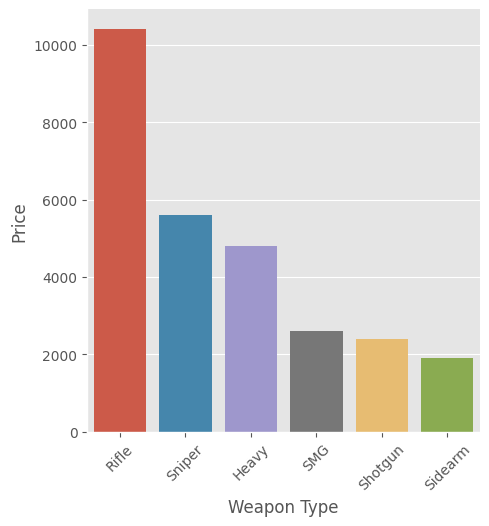

In [28]:
sns.catplot(kind='bar', data=type_price, x='Weapon Type', y='Price')
plt.xticks(rotation=45)
plt.show()

# Which weapon has the highest fire rate?

## Based on Weapon

In [29]:
fire_rate = df[['Name', 'Fire Rate']].sort_values(by='Fire Rate', ascending=False)
fire_rate.head()

,Name,Fire Rate
5,Stinger,18.00
6,Spectre,13.33
16,Odin,12.00
9,Phantom,11.00
2,Frenzy,10.00


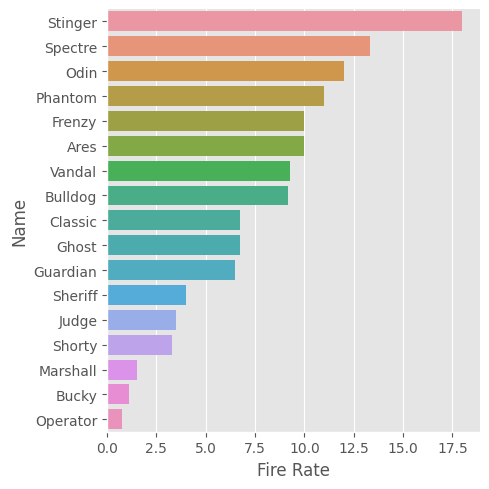

In [30]:
sns.catplot(data=fire_rate, y='Name', x='Fire Rate', kind='bar')
plt.show()

## Based on Type

In [31]:
fire_rate_type = df.groupby('Weapon Type')[['Weapon Type', 'Fire Rate']].agg('mean').sort_values(by='Fire Rate', ascending=False).reset_index()
fire_rate_type

<ipython-input-31-bd4114264621>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fire_rate_type = df.groupby('Weapon Type')[['Weapon Type', 'Fire Rate']].agg('mean').sort_values(by='Fire Rate', ascending=False).reset_index()


,Weapon Type,Fire Rate
0,SMG,15.665
1,Heavy,11.000
2,Rifle,8.975
3,Sidearm,6.160
4,Shotgun,2.300
5,Sniper,1.125


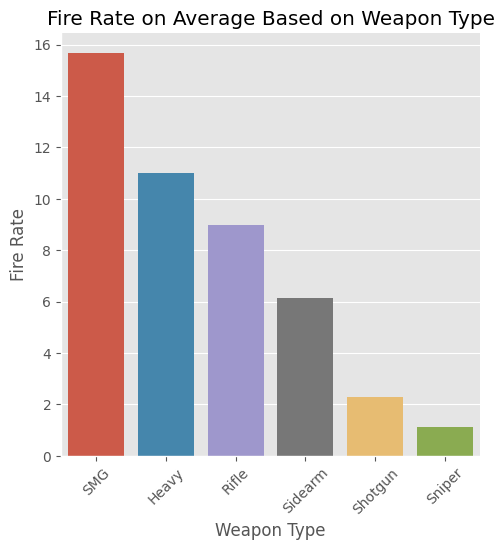

In [32]:
sns.catplot(kind='bar', data=fire_rate_type, x='Weapon Type', y='Fire Rate')
plt.xticks(rotation=45)
plt.title('Fire Rate on Average Based on Weapon Type')
plt.show()

# How is the Wall Penetration distributed across weapons?

In [33]:
wall_penet = df[['Name', 'Wall Penetration']].groupby('Wall Penetration').agg('count').reset_index()
wall_penet

,Wall Penetration,Name
0,High,4
1,Low,5
2,Medium,8


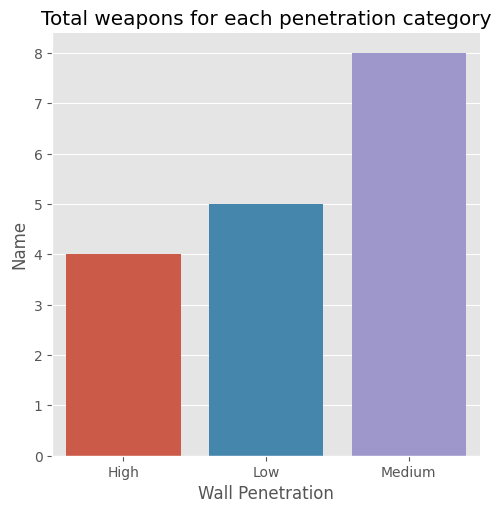

In [34]:
sns.catplot(kind='bar', data=wall_penet, x='Wall Penetration', y='Name')
plt.title('Total weapons for each penetration category')
plt.show()

# Which weapons have a high Magazine Capacity?

In [35]:
capacity = df[['Name', 'Weapon Type', 'Magazine Capacity']].sort_values('Magazine Capacity', ascending=False)
capacity

,Name,Weapon Type,Magazine Capacity
16,Odin,Heavy,100
15,Ares,Heavy,50
9,Phantom,Rifle,30
6,Spectre,SMG,30
10,Vandal,Rifle,25
7,Bulldog,Rifle,24
5,Stinger,SMG,20
3,Ghost,Sidearm,15
2,Frenzy,Sidearm,13
0,Classic,Sidearm,12


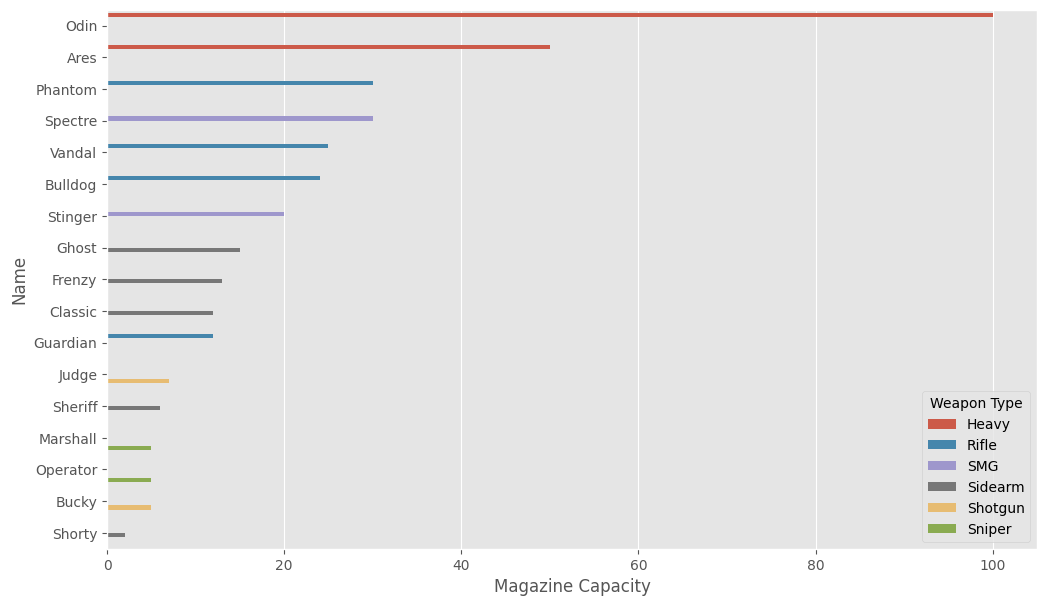

In [36]:
plt.subplots(figsize=(12,7))
sns.barplot(data=capacity, x='Magazine Capacity', y='Name', hue='Weapon Type')
plt.show()

# Weapon Damage

In [37]:
damage = df[['Name', 'Weapon Type', 'HDMG_0','BDMG_0','LDMG_0','HDMG_1','BDMG_1','LDMG_1','HDMG_2','BDMG_2','LDMG_2']]
damage.columns = ['Name', 'Weapon Type', 'HD Close', 'BD Close','LD Close','HD Mid','BD Mid','LD Mid','HD Far','BD Far','LD Far']
damage.head()

,Name,Weapon Type,HD Close,BD Close,LD Close,HD Mid,BD Mid,LD Mid,HD Far,BD Far,LD Far
0,Classic,Sidearm,78,26,22,78,26,22,66,22,18
1,Shorty,Sidearm,36,12,10,24,8,6,9,3,2
2,Frenzy,Sidearm,78,26,22,63,21,17,63,21,17
3,Ghost,Sidearm,105,33,26,88,25,21,88,25,21
4,Sheriff,Sidearm,160,55,47,160,55,47,145,50,43


## Close Range Damage

In [38]:
close_damage = damage[['Name','Weapon Type','HD Close','BD Close','LD Close']]
close_damage.head()

,Name,Weapon Type,HD Close,BD Close,LD Close
0,Classic,Sidearm,78,26,22
1,Shorty,Sidearm,36,12,10
2,Frenzy,Sidearm,78,26,22
3,Ghost,Sidearm,105,33,26
4,Sheriff,Sidearm,160,55,47


In [39]:
close_damage = pd.melt(close_damage, id_vars =['Name', 'Weapon Type'], value_vars =['HD Close','BD Close','LD Close']).rename(columns=str.title)
close_damage.head()

,Name,Weapon Type,Variable,Value
0,Classic,Sidearm,HD Close,78
1,Shorty,Sidearm,HD Close,36
2,Frenzy,Sidearm,HD Close,78
3,Ghost,Sidearm,HD Close,105
4,Sheriff,Sidearm,HD Close,160


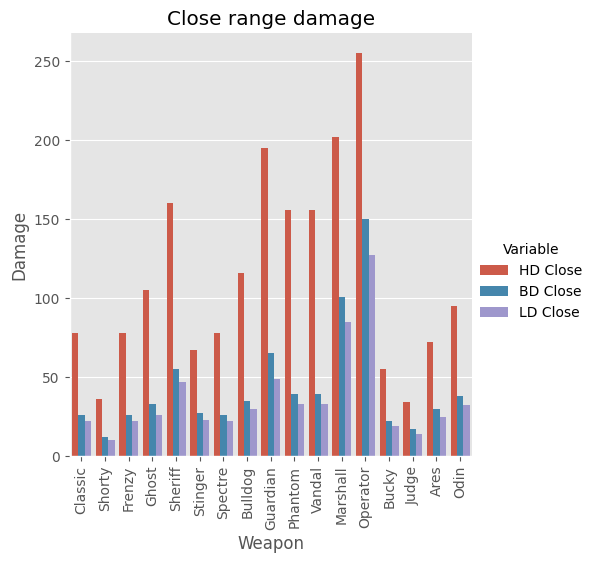

In [40]:
sns.catplot(data=close_damage, x='Name', y='Value', hue='Variable', kind='bar')
plt.xticks(rotation=90)
plt.title('Close range damage')
plt.xlabel('Weapon')
plt.ylabel('Damage')
plt.show()

## Mid Range Damage

In [41]:
mid_damage = damage[['Name','Weapon Type','HD Mid','BD Mid','LD Mid']]
mid_damage.head()

,Name,Weapon Type,HD Mid,BD Mid,LD Mid
0,Classic,Sidearm,78,26,22
1,Shorty,Sidearm,24,8,6
2,Frenzy,Sidearm,63,21,17
3,Ghost,Sidearm,88,25,21
4,Sheriff,Sidearm,160,55,47


In [42]:
mid_damage = pd.melt(mid_damage, id_vars =['Name', 'Weapon Type'], value_vars =['HD Mid','BD Mid','LD Mid']).rename(columns=str.title)
mid_damage.head()

,Name,Weapon Type,Variable,Value
0,Classic,Sidearm,HD Mid,78
1,Shorty,Sidearm,HD Mid,24
2,Frenzy,Sidearm,HD Mid,63
3,Ghost,Sidearm,HD Mid,88
4,Sheriff,Sidearm,HD Mid,160


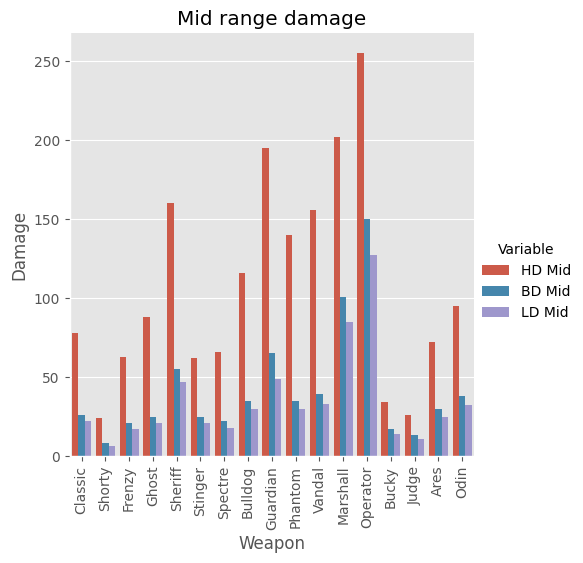

In [43]:
sns.catplot(data=mid_damage, x='Name', y='Value', hue='Variable', kind='bar')
plt.xticks(rotation=90)
plt.title('Mid range damage')
plt.xlabel('Weapon')
plt.ylabel('Damage')
plt.show()

## Far Range Damage

In [44]:
far_damage = damage[['Name','Weapon Type','HD Far','BD Far','LD Far']]
far_damage.head()

,Name,Weapon Type,HD Far,BD Far,LD Far
0,Classic,Sidearm,66,22,18
1,Shorty,Sidearm,9,3,2
2,Frenzy,Sidearm,63,21,17
3,Ghost,Sidearm,88,25,21
4,Sheriff,Sidearm,145,50,43


In [45]:
far_damage = pd.melt(far_damage, id_vars =['Name', 'Weapon Type'], value_vars =['HD Far','BD Far','LD Far']).rename(columns=str.title)
far_damage.head()

,Name,Weapon Type,Variable,Value
0,Classic,Sidearm,HD Far,66
1,Shorty,Sidearm,HD Far,9
2,Frenzy,Sidearm,HD Far,63
3,Ghost,Sidearm,HD Far,88
4,Sheriff,Sidearm,HD Far,145


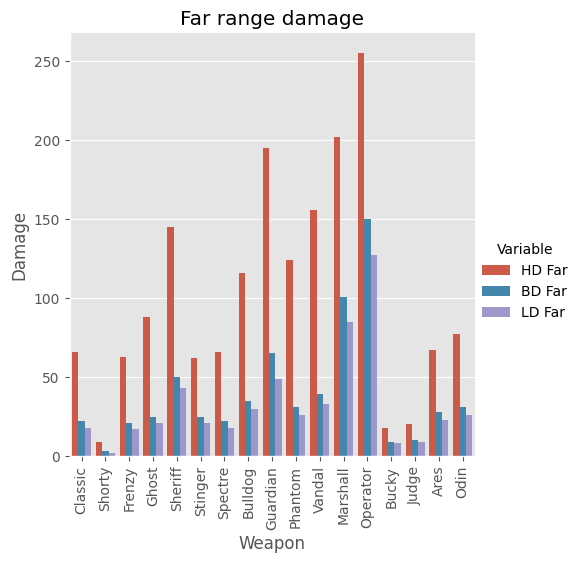

In [46]:
sns.catplot(data=far_damage, x='Name', y='Value', hue='Variable', kind='bar')
plt.xticks(rotation=90)
plt.title('Far range damage')
plt.xlabel('Weapon')
plt.ylabel('Damage')
plt.show()

# Damage Per Weapon

In [47]:
damage_per_weapon = pd.melt(damage, id_vars =['Name', 'Weapon Type'], value_vars =['HD Close', 'BD Close','LD Close','HD Mid','BD Mid','LD Mid','HD Far','BD Far','LD Far']).rename(columns=str.title)
damage_per_weapon.head()

,Name,Weapon Type,Variable,Value
0,Classic,Sidearm,HD Close,78
1,Shorty,Sidearm,HD Close,36
2,Frenzy,Sidearm,HD Close,78
3,Ghost,Sidearm,HD Close,105
4,Sheriff,Sidearm,HD Close,160


In [48]:
damage_per_weapon['Range'] = damage_per_weapon['Variable'].str.split(' ').str[1]
damage_per_weapon.head()

,Name,Weapon Type,Variable,Value,Range
0,Classic,Sidearm,HD Close,78,Close
1,Shorty,Sidearm,HD Close,36,Close
2,Frenzy,Sidearm,HD Close,78,Close
3,Ghost,Sidearm,HD Close,105,Close
4,Sheriff,Sidearm,HD Close,160,Close


In [49]:
damage_per_weapon['Aim'] = damage_per_weapon['Variable'].str.split(' ').str[0]
damage_per_weapon.head()

,Name,Weapon Type,Variable,Value,Range,Aim
0,Classic,Sidearm,HD Close,78,Close,HD
1,Shorty,Sidearm,HD Close,36,Close,HD
2,Frenzy,Sidearm,HD Close,78,Close,HD
3,Ghost,Sidearm,HD Close,105,Close,HD
4,Sheriff,Sidearm,HD Close,160,Close,HD


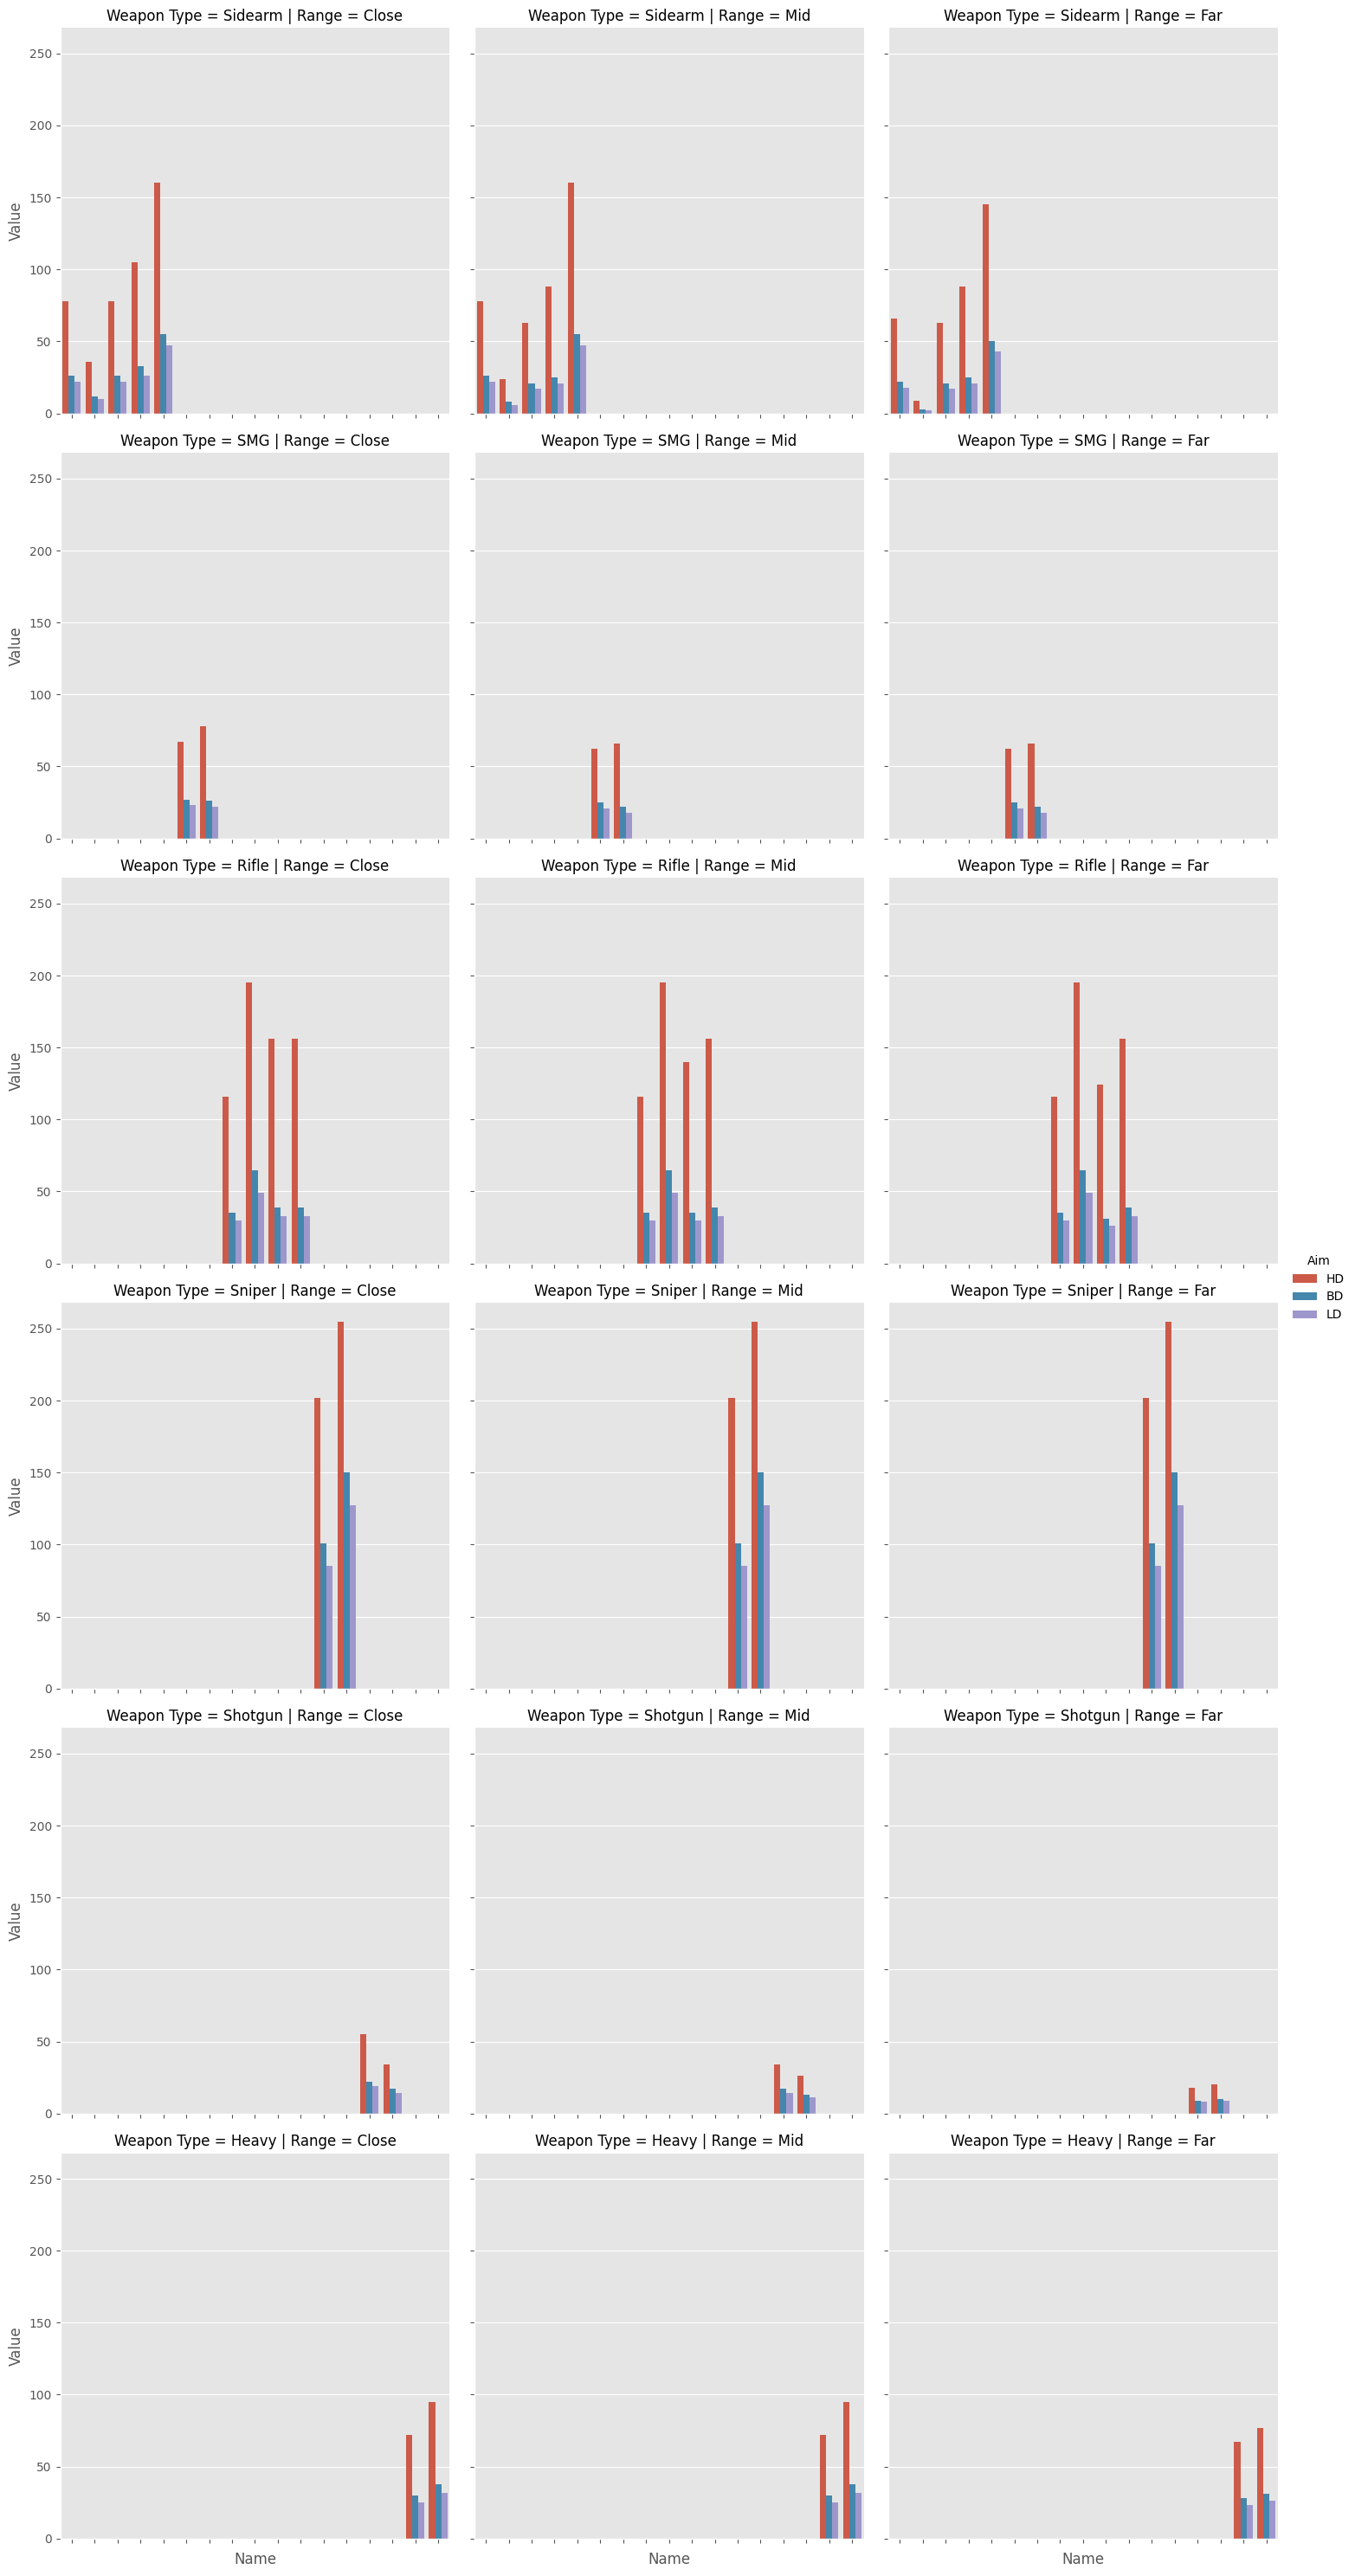

In [50]:
g = sns.catplot(data=damage_per_weapon, x='Name', y='Value', hue='Aim', kind='bar', row='Weapon Type', col='Range')
g.set_xticklabels(rotation=90)
plt.show()

# Weapon with high damage for less cost: Weapon Damage Cost (WDC)

`assuming only headshots`

In [51]:
weapon_damage_cost = df[['Name', 'Price', 'HDMG_0', 'HDMG_1', 'HDMG_2']]
weapon_damage_cost.columns = ['Name', 'Price', 'HD Close', 'HD Mid', 'HD Far']
weapon_damage_cost = pd.melt(weapon_damage_cost, id_vars=['Name', 'Price'], value_vars=['HD Close', 'HD Mid', 'HD Far'])
weapon_damage_cost.head()

,Name,Price,variable,value
0,Classic,0,HD Close,78
1,Shorty,200,HD Close,36
2,Frenzy,400,HD Close,78
3,Ghost,500,HD Close,105
4,Sheriff,800,HD Close,160


In [52]:
weapon_damage_cost['WDC'] = np.round(weapon_damage_cost['Price'] / weapon_damage_cost['value'], 2)
weapon_damage_cost.head()

,Name,Price,variable,value,WDC
0,Classic,0,HD Close,78,0.00
1,Shorty,200,HD Close,36,5.56
2,Frenzy,400,HD Close,78,5.13
3,Ghost,500,HD Close,105,4.76
4,Sheriff,800,HD Close,160,5.00


In [53]:
weapon_damage_cost_sorted = weapon_damage_cost.sort_values(by='WDC')
weapon_damage_cost_sorted.head()

,Name,Price,variable,value,WDC
0,Classic,0,HD Close,78,0.00
34,Classic,0,HD Far,66,0.00
17,Classic,0,HD Mid,78,0.00
3,Ghost,500,HD Close,105,4.76
4,Sheriff,800,HD Close,160,5.00


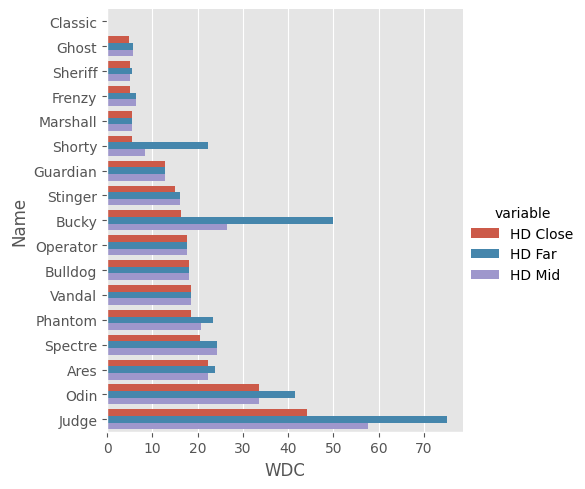

In [54]:
sns.catplot(data=weapon_damage_cost_sorted, x='WDC', y='Name', hue='variable', kind='bar')
plt.show()

# Regression Plot

In [55]:
weapon_damage_cost.head()

,Name,Price,variable,value,WDC
0,Classic,0,HD Close,78,0.00
1,Shorty,200,HD Close,36,5.56
2,Frenzy,400,HD Close,78,5.13
3,Ghost,500,HD Close,105,4.76
4,Sheriff,800,HD Close,160,5.00


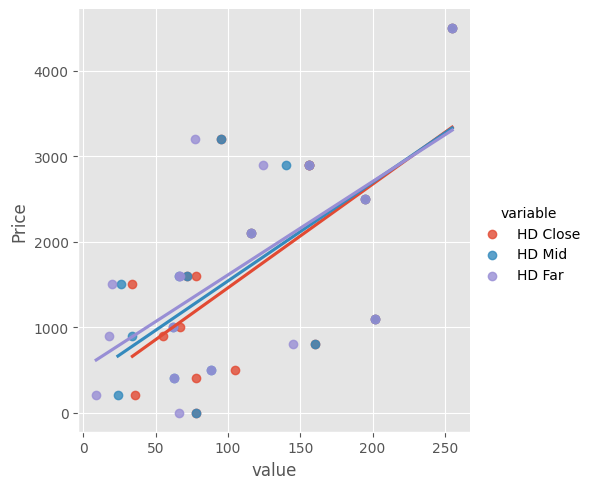

In [56]:
sns.lmplot(data=weapon_damage_cost, x='value', y='Price', ci=None, hue='variable')
plt.show()